<a href="https://colab.research.google.com/github/riccardoorru/painting_genre_recognition/blob/main/1_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
from google.colab import drive
from google.colab import files
import shutil

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import class_weight

from numpy.random import seed
import pickle
seed(1)
tf.random.set_seed(1)

! pip install split-folders
! pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riccardoorru","key":"c3342df245eedcdbd034520524f2aa55"}'}

In [ ]:
! dir


kaggle.json  sample_data


In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37          21050        448  1.0              
samyakb/student-stress-factors                              Student stress factors                            887B  2023-11-02 12:42:11           2047         48  0.9411765        
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)           139KB  2023-09-29 13:39:28          11520        279  1.0              
adeolaadesina/factors-affecting-children-anemia-level       Factors Affecting Children Anemia L

In [ ]:
! kaggle datasets download -d ikarus777/best-artworks-of-all-time

100% 2.29G/2.29G [00:25<00:00, 44.3MB/s]
100% 2.29G/2.29G [00:25<00:00, 97.4MB/s]


In [ ]:
! unzip best-artworks-of-all-time.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: resized/resized/Henri_Rousseau_61.jpg  
  inflating: resized/resized/Henri_Rousseau_62.jpg  
  inflating: resized/resized/Henri_Rousseau_63.jpg  
  inflating: resized/resized/Henri_Rousseau_64.jpg  
  inflating: resized/resized/Henri_Rousseau_65.jpg  
  inflating: resized/resized/Henri_Rousseau_66.jpg  
  inflating: resized/resized/Henri_Rousseau_67.jpg  
  inflating: resized/resized/Henri_Rousseau_68.jpg  
  inflating: resized/resized/Henri_Rousseau_69.jpg  
  inflating: resized/resized/Henri_Rousseau_7.jpg  
  inflating: resized/resized/Henri_Rousseau_70.jpg  
  inflating: resized/resized/Henri_Rousseau_8.jpg  
  inflating: resized/resized/Henri_Rousseau_9.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_1.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_10.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_11.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_12.jpg  
  inflati

In [ ]:
artists = pd.read_csv("artists.csv")

In [ ]:
artists["genre"].nunique()

31

In [ ]:
artists["genre"].unique()

array(['Expressionism', 'Expressionism,Abstractionism',
       'Social Realism,Muralism', 'Impressionism',
       'Surrealism,Impressionism', 'Surrealism', 'Realism,Impressionism',
       'Byzantine Art', 'Post-Impressionism', 'Symbolism,Art Nouveau',
       'Northern Renaissance', 'Suprematism', 'Symbolism', 'Cubism',
       'Baroque', 'Romanticism', 'Primitivism,Surrealism', 'Mannerism',
       'Primitivism', 'Proto Renaissance', 'Early Renaissance',
       'High Renaissance', 'Impressionism,Post-Impressionism',
       'High Renaissance,Mannerism', 'Realism', 'Symbolism,Expressionism',
       'Expressionism,Abstractionism,Surrealism', 'Neoplasticism',
       'Pop Art', 'Symbolism,Post-Impressionism',
       'Abstract Expressionism'], dtype=object)

In [ ]:
artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [ ]:
artists.shape

(50, 8)

In [ ]:
numero_totale_dipinti = artists['paintings'].sum()
numero_totale_dipinti

8446

BUILDIN TRAINING AND TESTING SET

In [ ]:
print(("Total number of paintings of artist with more than 150 paintings: {paintings_150}").format(paintings_150 = sum(artists[artists["paintings"] > 150]["paintings"])))
print(("Total number of paintings in the whole dataset: {paintings_tot}").format(paintings_tot = sum(artists["paintings"])))
print(("Number of artists with more than 150 paintings: {classes_150}").format(classes_150 = artists[artists["paintings"] > 150].shape[0]))
print(("Number of artists considering the whole dataset: {classes_tot}").format(classes_tot = artists.shape[0]))


Total number of paintings of artist with more than 150 paintings: 5576
Total number of paintings in the whole dataset: 8446
Number of artists with more than 150 paintings: 18
Number of artists considering the whole dataset: 50


In [ ]:
artists150 = artists[artists["paintings"] > 150]
artists150 = artists150[["genre","name","paintings"]].reset_index()
artists150['genre'] = [x.replace(" ", "-") for x in artists150['genre']]
artists150.drop(["index"], inplace=True, axis=1)
artists150 = artists150[artists150["name"] !="Albrecht Dürer"]
artists150

,genre,name,paintings
0,Expressionism,Amedeo Modigliani,193
1,"Surrealism,Impressionism",Rene Magritte,194
2,Post-Impressionism,Vincent van Gogh,877
3,Symbolism,Mikhail Vrubel,171
4,Cubism,Pablo Picasso,439
5,Impressionism,Pierre-Auguste Renoir,336
6,Romanticism,Francisco Goya,291
8,Impressionism,Alfred Sisley,259
9,Primitivism,Marc Chagall,239
10,Early-Renaissance,Sandro Botticelli,164


In [ ]:

# Create a list of genre with more than 150 paintings
list_of_genre = list(artists150[artists150["paintings"] > 150]["genre"])
print("list_of_genre->",list_of_genre)
list_of_genre = [x.replace(" ", "-") for x in list_of_genre]
import nltk
nltk.download('punkt')
vocab = set()
for x in list_of_genre:
    vocab.update(nltk.word_tokenize(x))

vocab.remove(',');
vocab


list_of_genre-> ['Expressionism', 'Surrealism,Impressionism', 'Post-Impressionism', 'Symbolism', 'Cubism', 'Impressionism', 'Romanticism', 'Impressionism', 'Primitivism', 'Early-Renaissance', 'Impressionism,Post-Impressionism', 'Impressionism', 'Baroque', 'High-Renaissance,Mannerism', 'Expressionism,Abstractionism,Surrealism', 'Pop-Art', 'Symbolism,Post-Impressionism']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'Abstractionism',
 'Baroque',
 'Cubism',
 'Early-Renaissance',
 'Expressionism',
 'High-Renaissance',
 'Impressionism',
 'Mannerism',
 'Pop-Art',
 'Post-Impressionism',
 'Primitivism',
 'Romanticism',
 'Surrealism',
 'Symbolism'}

In [ ]:
genre150=pd.DataFrame(vocab)
genre150

,0
0,Mannerism
1,Abstractionism
2,High-Renaissance
3,Primitivism
4,Cubism
5,Romanticism
6,Expressionism
7,Symbolism
8,Early-Renaissance
9,Pop-Art


In [ ]:
#I GENERI DEGLI ARTISTI CON PIU' DI 150 DIPINTI
for i in artists150.index:
   print(
        i," "
        + artists150["genre"][i])

0  Expressionism
1  Surrealism,Impressionism
2  Post-Impressionism
3  Symbolism
4  Cubism
5  Impressionism
6  Romanticism
8  Impressionism
9  Primitivism
10  Early-Renaissance
11  Impressionism,Post-Impressionism
12  Impressionism
13  Baroque
14  High-Renaissance,Mannerism
15  Expressionism,Abstractionism,Surrealism
16  Pop-Art
17  Symbolism,Post-Impressionism


In [ ]:
genre150.columns=["genre"]
genre150

,genre
0,Mannerism
1,Abstractionism
2,High-Renaissance
3,Primitivism
4,Cubism
5,Romanticism
6,Expressionism
7,Symbolism
8,Early-Renaissance
9,Pop-Art


In [ ]:
genre150['artists'] = np.empty((len(genre150), 0)).tolist()
genre150['nPaintings']= np.zeros((len(genre150)));
genre150

,genre,artists,nPaintings
0,Mannerism,[],0.0
1,Abstractionism,[],0.0
2,High-Renaissance,[],0.0
3,Primitivism,[],0.0
4,Cubism,[],0.0
5,Romanticism,[],0.0
6,Expressionism,[],0.0
7,Symbolism,[],0.0
8,Early-Renaissance,[],0.0
9,Pop-Art,[],0.0


In [ ]:
app=[]
for i in genre150.index:
   print(
        i," "
        + genre150["genre"][i])
   for j in artists150.index:
    if genre150["genre"][i] in artists150["genre"][j]:
      if artists150["name"][j] != 'Albrecht Dürer' :
        app.append(artists150["name"][j])
    genre150["artists"][i]=app
   app=[]

genre150

0  Mannerism
1  Abstractionism
2  High-Renaissance
3  Primitivism
4  Cubism
5  Romanticism
6  Expressionism
7  Symbolism
8  Early-Renaissance
9  Pop-Art
10  Post-Impressionism
11  Surrealism
12  Impressionism
13  Baroque


<ipython-input-21-f78b1298edfd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre150["artists"][i]=app


,genre,artists,nPaintings
0,Mannerism,[Titian],0.0
1,Abstractionism,[Paul Klee],0.0
2,High-Renaissance,[Titian],0.0
3,Primitivism,[Marc Chagall],0.0
4,Cubism,[Pablo Picasso],0.0
5,Romanticism,[Francisco Goya],0.0
6,Expressionism,"[Amedeo Modigliani, Paul Klee]",0.0
7,Symbolism,"[Mikhail Vrubel, Paul Gauguin]",0.0
8,Early-Renaissance,[Sandro Botticelli],0.0
9,Pop-Art,[Andy Warhol],0.0


In [ ]:
genre150

,genre,artists,nPaintings
0,Mannerism,[Titian],0.0
1,Abstractionism,[Paul Klee],0.0
2,High-Renaissance,[Titian],0.0
3,Primitivism,[Marc Chagall],0.0
4,Cubism,[Pablo Picasso],0.0
5,Romanticism,[Francisco Goya],0.0
6,Expressionism,"[Amedeo Modigliani, Paul Klee]",0.0
7,Symbolism,"[Mikhail Vrubel, Paul Gauguin]",0.0
8,Early-Renaissance,[Sandro Botticelli],0.0
9,Pop-Art,[Andy Warhol],0.0


In [ ]:
pd.options.mode.chained_assignment = None
genre150['nPaintings']=0
for i in genre150.index:
   for j in artists150.index:
    if artists150["name"][j] in genre150["artists"][i]:
      genre150['nPaintings'][i]+=artists150['paintings'][j]

genre150

,genre,artists,nPaintings
0,Mannerism,[Titian],255
1,Abstractionism,[Paul Klee],188
2,High-Renaissance,[Titian],255
3,Primitivism,[Marc Chagall],239
4,Cubism,[Pablo Picasso],439
5,Romanticism,[Francisco Goya],291
6,Expressionism,"[Amedeo Modigliani, Paul Klee]",381
7,Symbolism,"[Mikhail Vrubel, Paul Gauguin]",482
8,Early-Renaissance,[Sandro Botticelli],164
9,Pop-Art,[Andy Warhol],181


In [ ]:
os.listdir("images/images/")

['Mikhail_Vrubel',
 'Joan_Miro',
 'Claude_Monet',
 'Francisco_Goya',
 'Paul_Cezanne',
 'William_Turner',
 'Edouard_Manet',
 'Kazimir_Malevich',
 'Amedeo_Modigliani',
 'El_Greco',
 'Henri_de_Toulouse-Lautrec',
 'Hieronymus_Bosch',
 'Sandro_Botticelli',
 'Giotto_di_Bondone',
 'Georges_Seurat',
 'Alfred_Sisley',
 'Gustave_Courbet',
 'Rene_Magritte',
 'Titian',
 'Henri_Matisse',
 'Paul_Klee',
 'Camille_Pissarro',
 'Andy_Warhol',
 'Diego_Velazquez',
 'Edvard_Munch',
 'Marc_Chagall',
 'Paul_Gauguin',
 'Piet_Mondrian',
 'Rembrandt',
 'Henri_Rousseau',
 'Pierre-Auguste_Renoir',
 'Albrecht_Du╠Иrer',
 'Diego_Rivera',
 'Michelangelo',
 'Albrecht_DuтХа├кrer',
 'Pieter_Bruegel',
 'Edgar_Degas',
 'Andrei_Rublev',
 'Pablo_Picasso',
 'Vincent_van_Gogh',
 'Jackson_Pollock',
 'Gustav_Klimt',
 'Frida_Kahlo',
 'Raphael',
 'Caravaggio',
 'Salvador_Dali',
 'Leonardo_da_Vinci',
 'Jan_van_Eyck',
 'Eugene_Delacroix',
 'Vasiliy_Kandinskiy',
 'Peter_Paul_Rubens']

In [ ]:
shutil.rmtree('images/images/Albrecht_DuтХа├кrer')

In [ ]:
#for i in genre150.index:
 # os.makedirs(os.path.dirname(genre150["artists"][i]), exist_ok=True)

In [ ]:
len(os.listdir("images/images/"))

50

In [ ]:
for image_dir in os.listdir("images/images/"):
  image_dir_new = image_dir
  image_dir_new = image_dir_new.replace("_", " ")
  print("image_dir->",image_dir)
  print("image_dirnew->",image_dir_new)
  os.rename("images/images/"+image_dir,"images/images/"+image_dir_new)

# Print the new names
os.listdir("images/images/")

image_dir-> Mikhail_Vrubel
image_dirnew-> Mikhail Vrubel
image_dir-> Joan_Miro
image_dirnew-> Joan Miro
image_dir-> Claude_Monet
image_dirnew-> Claude Monet
image_dir-> Francisco_Goya
image_dirnew-> Francisco Goya
image_dir-> Paul_Cezanne
image_dirnew-> Paul Cezanne
image_dir-> William_Turner
image_dirnew-> William Turner
image_dir-> Edouard_Manet
image_dirnew-> Edouard Manet
image_dir-> Kazimir_Malevich
image_dirnew-> Kazimir Malevich
image_dir-> Amedeo_Modigliani
image_dirnew-> Amedeo Modigliani
image_dir-> El_Greco
image_dirnew-> El Greco
image_dir-> Henri_de_Toulouse-Lautrec
image_dirnew-> Henri de Toulouse-Lautrec
image_dir-> Hieronymus_Bosch
image_dirnew-> Hieronymus Bosch
image_dir-> Sandro_Botticelli
image_dirnew-> Sandro Botticelli
image_dir-> Giotto_di_Bondone
image_dirnew-> Giotto di Bondone
image_dir-> Georges_Seurat
image_dirnew-> Georges Seurat
image_dir-> Alfred_Sisley
image_dirnew-> Alfred Sisley
image_dir-> Gustave_Courbet
image_dirnew-> Gustave Courbet
image_dir-> Ren

['Kazimir Malevich',
 'Amedeo Modigliani',
 'Joan Miro',
 'Henri Rousseau',
 'Gustav Klimt',
 'Alfred Sisley',
 'Jan van Eyck',
 'Gustave Courbet',
 'Rene Magritte',
 'Hieronymus Bosch',
 'Albrecht Du╠Иrer',
 'William Turner',
 'Pablo Picasso',
 'Pieter Bruegel',
 'Mikhail Vrubel',
 'Paul Gauguin',
 'Titian',
 'Jackson Pollock',
 'Paul Klee',
 'Edgar Degas',
 'Andy Warhol',
 'Piet Mondrian',
 'Peter Paul Rubens',
 'Paul Cezanne',
 'Rembrandt',
 'Salvador Dali',
 'Claude Monet',
 'Andrei Rublev',
 'Leonardo da Vinci',
 'Edvard Munch',
 'Diego Rivera',
 'Henri de Toulouse-Lautrec',
 'Edouard Manet',
 'El Greco',
 'Michelangelo',
 'Henri Matisse',
 'Marc Chagall',
 'Camille Pissarro',
 'Diego Velazquez',
 'Francisco Goya',
 'Vasiliy Kandinskiy',
 'Vincent van Gogh',
 'Giotto di Bondone',
 'Eugene Delacroix',
 'Frida Kahlo',
 'Georges Seurat',
 'Raphael',
 'Pierre-Auguste Renoir',
 'Caravaggio',
 'Sandro Botticelli']

In [ ]:
# Create a list of genre with more than 150 paintings
list_of_artists = list(artists[artists["paintings"] > 150]["name"])
list_of_artists


['Amedeo Modigliani',
 'Rene Magritte',
 'Vincent van Gogh',
 'Mikhail Vrubel',
 'Pablo Picasso',
 'Pierre-Auguste Renoir',
 'Francisco Goya',
 'Albrecht Dürer',
 'Alfred Sisley',
 'Marc Chagall',
 'Sandro Botticelli',
 'Henri Matisse',
 'Edgar Degas',
 'Rembrandt',
 'Titian',
 'Paul Klee',
 'Andy Warhol',
 'Paul Gauguin']

In [ ]:
genre150

,genre,artists,nPaintings
0,Mannerism,[Titian],255
1,Abstractionism,[Paul Klee],188
2,High-Renaissance,[Titian],255
3,Primitivism,[Marc Chagall],239
4,Cubism,[Pablo Picasso],439
5,Romanticism,[Francisco Goya],291
6,Expressionism,"[Amedeo Modigliani, Paul Klee]",381
7,Symbolism,"[Mikhail Vrubel, Paul Gauguin]",482
8,Early-Renaissance,[Sandro Botticelli],164
9,Pop-Art,[Andy Warhol],181


In [ ]:
#Creation of a directory containing the directories of the artists with more
# than 150 paintings
print(list_of_artists)
for image_dir in os.listdir("images/images/"):
 # print(image_dir)
  if image_dir in list_of_artists:
    shutil.copytree("images/images/"+image_dir, "images/images150/"+image_dir)

['Amedeo Modigliani', 'Rene Magritte', 'Vincent van Gogh', 'Mikhail Vrubel', 'Pablo Picasso', 'Pierre-Auguste Renoir', 'Francisco Goya', 'Albrecht Dürer', 'Alfred Sisley', 'Marc Chagall', 'Sandro Botticelli', 'Henri Matisse', 'Edgar Degas', 'Rembrandt', 'Titian', 'Paul Klee', 'Andy Warhol', 'Paul Gauguin']


In [ ]:
#rm -r images/images150

In [ ]:
#create folder for traningset and for test set
import splitfolders

# Split the folders in two folders with the same structure, one contains 80% of
# the images and the the other the 20%, the first will be the training set
# while the secondo will be the test set
splitfolders.ratio("images/images150", output="images/output150",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 5248 files [00:05, 1019.33 files/s]


In [ ]:
ls

artists.csv  best-artworks-of-all-time.zip  images/  kaggle.json  resized/  sample_data/


In [ ]:
#Now we check if there is intersection between images in the test set and in the
# ones of the training set, since we don't want to test using images already
# used in the training phase

#We build two sets
set1 = set(os.listdir("images/output150/val/Vincent van Gogh"))
set2 = set(os.listdir("images/output150/train/Vincent van Gogh"))

#Print the len
print(len(set1))
print(len(set2))

#Make the intersection, we expect to obtain set()
set1.intersection(set2)



176
701


set()

In [ ]:
type(genre150["artists"])

pandas.core.series.Series

In [ ]:
from google.colab import drive
drive.mount('RiccardoOrruProject')


Mounted at RiccardoOrruProject


In [ ]:
# Create the dataset directory
dir_name = "RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset"

if not os.path.exists(dir_name):
  os.makedirs(dir_name)

# Copy recursively the test set and the training set inside the dataset directory
for dir in os.listdir("images/output150"):
  if not os.path.exists(dir_name+"/"+dir):
    shutil.copytree("images/output150/" + dir, dir_name+"/"+dir)




In [ ]:
dir="RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/val/genre/";
for i in genre150.index:
  if not os.path.exists(dir+genre150["genre"][i]):
    os.makedirs(dir+genre150["genre"][i])

In [ ]:
dir="RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/train/genre/";
for i in genre150.index:
  if not os.path.exists(dir+genre150["genre"][i]):
    os.makedirs(dir+genre150["genre"][i])

In [ ]:
path="RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/val/genre"
for dir in os.listdir(path):
  for i in genre150.index:
    if genre150['genre'][i]==dir:
      for j in genre150['artists'][i]:
        if not os.path.exists(path+"/"+dir+"/"+j):
          shutil.copytree("images/output150/val/" + j, path+"/"+dir+"/"+j)

path2="RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/train/genre"
for dir in os.listdir(path2):
  for i in genre150.index:
    if genre150['genre'][i]==dir:
      for j in genre150['artists'][i]:
        if not os.path.exists(path2+"/"+dir+"/"+j):
          shutil.copytree("images/output150/train/" + j, path2+"/"+dir+"/"+j)


In [ ]:


#Save the genre info into a csv on the shared drive

genre150.to_csv('RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/genre150.csv', index=False)

#Test of loading the csv file saved in the previous cell
genre150Csv = pd.read_csv('RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/genre150.csv')

#Print the csv file as a dataframe
genre150Csv


,genre,artists,nPaintings
0,Mannerism,['Titian'],255
1,Abstractionism,['Paul Klee'],188
2,High-Renaissance,['Titian'],255
3,Primitivism,['Marc Chagall'],239
4,Cubism,['Pablo Picasso'],439
5,Romanticism,['Francisco Goya'],291
6,Expressionism,"['Amedeo Modigliani', 'Paul Klee']",381
7,Symbolism,"['Mikhail Vrubel', 'Paul Gauguin']",482
8,Early-Renaissance,['Sandro Botticelli'],164
9,Pop-Art,['Andy Warhol'],181


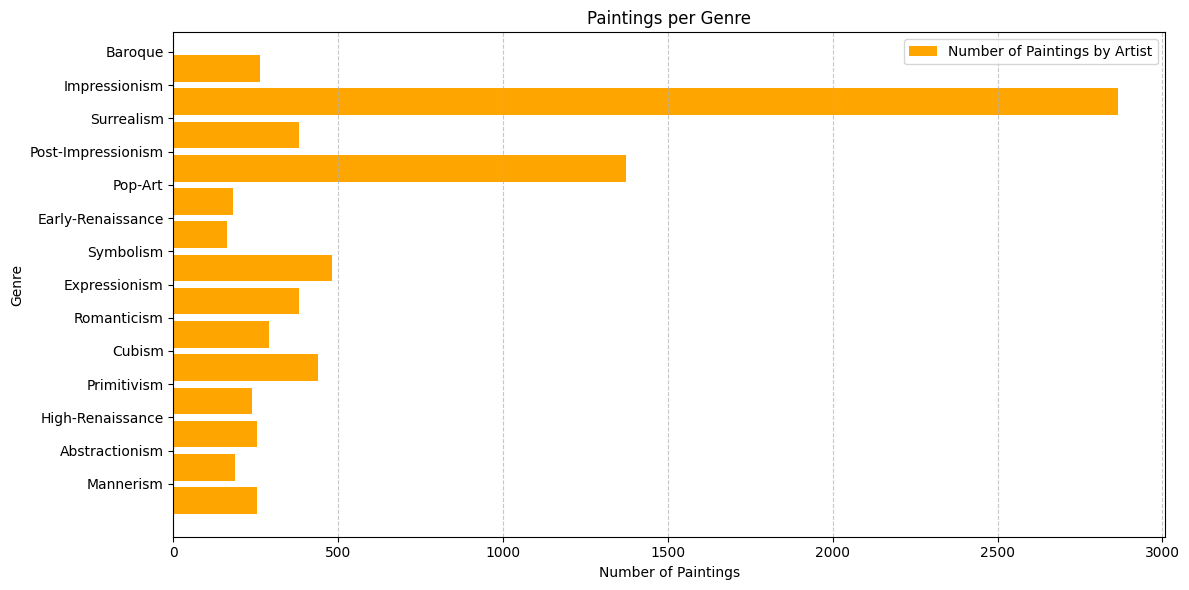

In [ ]:
# Now we want to see how the classes are balanced

plt.figure(figsize=(12, 6))

genre_list = genre150Csv["genre"]
paintings_list = genre150Csv["nPaintings"]

length = len(genre_list)

plt.yticks(np.arange(length) + .5, genre_list)
plt.ylabel("Genre")
plt.xlabel("Number of Paintings")
plt.title("Paintings per Genre")

plt.barh(genre_list, paintings_list, color='orange', label='Number of Paintings by Artist')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
class_weights = []

class_occ = genre150Csv["nPaintings"].to_numpy() #array of occurrences
number_of_samples = sum(class_occ) #tot
number_of_classes = len(class_occ) #tot_Classes


print("number of samples: ",number_of_samples)
print("number of classes: ",number_of_classes)

#for each total number of occurrencese for each class we compute the weights
for occ in class_occ:
  weight = number_of_samples / (number_of_classes*occ)
  class_weights.append(weight)

dict(zip(list(genre150Csv["genre"]), class_weights))

genre150Csv = genre150Csv.assign(weight=class_weights)

genre150Csv.sort_values("weight")
#As we can see in the results we have a low weight for the artists with a lot of
# paintings, while bigger weight for artists with fewer paintings

number of samples:  7758
number of classes:  14
occ: 255
occ: 188
occ: 255
occ: 239
occ: 439
occ: 291
occ: 381
occ: 482
occ: 164
occ: 181
occ: 1374
occ: 382
occ: 2865
occ: 262


,genre,artists,nPaintings,weight
12,Impressionism,"['Rene Magritte', 'Vincent van Gogh', 'Pierre-...",2865,0.193418
10,Post-Impressionism,"['Vincent van Gogh', 'Henri Matisse', 'Paul Ga...",1374,0.403306
7,Symbolism,"['Mikhail Vrubel', 'Paul Gauguin']",482,1.149674
4,Cubism,['Pablo Picasso'],439,1.262284
11,Surrealism,"['Rene Magritte', 'Paul Klee']",382,1.450636
6,Expressionism,"['Amedeo Modigliani', 'Paul Klee']",381,1.454443
5,Romanticism,['Francisco Goya'],291,1.904271
13,Baroque,['Rembrandt'],262,2.115049
0,Mannerism,['Titian'],255,2.173109
2,High-Renaissance,['Titian'],255,2.173109


In [ ]:

genre150Csv.to_csv('RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/genre150.csv', index=False)

In [ ]:

generi = pd.read_csv('RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/genre150.csv')
generi

,genre,artists,nPaintings,weight
0,Mannerism,['Titian'],255,2.173109
1,Abstractionism,['Paul Klee'],188,2.947568
2,High-Renaissance,['Titian'],255,2.173109
3,Primitivism,['Marc Chagall'],239,2.318589
4,Cubism,['Pablo Picasso'],439,1.262284
5,Romanticism,['Francisco Goya'],291,1.904271
6,Expressionism,"['Amedeo Modigliani', 'Paul Klee']",381,1.454443
7,Symbolism,"['Mikhail Vrubel', 'Paul Gauguin']",482,1.149674
8,Early-Renaissance,['Sandro Botticelli'],164,3.378920
9,Pop-Art,['Andy Warhol'],181,3.061563
